# Life Expectancy and Its Relations to GDP: A Data Science Project

**Alfikri Ramadhan - [LinkedIn](https://www.linkedin.com/in/alfikri-ramadhan/)**

## About The Project
***
Life Expectancy, in short, refers to the number of years a person can expect to live. By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die ([ourworldindata.org](https://ourworldindata.org/life-expectancy-how-is-it-calculated-and-how-should-it-be-interpreted)). Life expectancy is a measure that is often used to gauge overall health of a country, and it has been a subject in many research and studies. Miladinov in his [publication](https://genus.springeropen.com/articles/10.1186/s41118-019-0071-0#Sec2) states that life expectancy is largely affected by the population health and socioeconomic development in a country. When population health and socioeconomic development in a country is improving, it is expected the life expectancy at birth appears to have increased.

Gross Domestic Product (GDP) is the monetary value of all finished goods and service made within a country during a specific period. GDP provides an economic snapshot of a country and used to estimate the size of an economy and growth rate. Countries with larger GDPs will have a greater amount of goods and services generated within them. For this reason, GDP growth is accounted for as an important measure of a national success, often referred as GDP growth and economic growth interchangeably. ([Investopedia](https://www.investopedia.com/terms/g/gdp.asp)).

This project will investigates the effect of socioeconomic development on life expectancy in six countries (Chile, China , Germany, Mexico, United States of America, and Zimbabwe). This project aims to answer the following questions:

- What is the average life expectancy of these nations?
- What is the distribution of that life expectancy?
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?

Each section of this Notebook will contain code that is being used to analyze the dataset, as well as any findings. The aim is to provide both insights into the data while also showcasing coding and data analysis skills.

## The Dataset
***
**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

The dataset consists of 4 columns:

Variable | Description
:------- | :----------
Country | Country of observation
Year | Year of observation
Life Expectancy at birth (years) | Life expectancy in age
GDP | Gross Domestic Product per capita (in USD)

## Import the Dataset
***

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
# load the dataset
df = pd.read_csv('gdp_leaby_data.csv')

# sample of data
df.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.sample(5)

,Country,Year,Life expectancy at birth (years),GDP
82,Zimbabwe,2002,44.8,6.342116e+09
68,United States of America,2004,77.5,1.230000e+13
59,Mexico,2011,76.1,1.171190e+12
7,Chile,2007,78.9,1.736060e+11
74,United States of America,2010,78.7,1.500000e+13


## Investigate the Dataset

In [4]:
# size of data
df.shape

(96, 4)

In [5]:
# quick overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
# check null values
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [8]:
# statistical summary of the data
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [9]:
# statistical summary of the data
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [10]:
print(f'Unique Values of Country: \n {df.Country.unique()}')

Unique Values of Country: 
 ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [11]:
df.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [12]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


From early investigation of our dataset, some information we can get:
- There are 4 columns and 96 rows in the dataset
- There are 1 categorical variable and 3 numerical variables
- There are no missing values
- There are 6 different countries on the dataset: Chile, China, Germany, Mexico, United States of America, and Zimbabwe
- The dataset cover the years from 2000 to 2015

## Data Exploration
***
#### Cleaning column name

In [13]:
print(df.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


Looking at the column names, there are inconsistencies with the column names. All of the column names are using one word except for `Life expectancy at birth (years)`. While this column is descriptive and gives clear explanation for the rows, lengthy column name will take too many spaces in our coding. Let's rename the column and shorten it to `LEABY`

In [14]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [15]:
df = df.rename(columns={'Life expectancy at birth (years)': 'LEABY'})
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Distribution of Life Expectancy and GDP

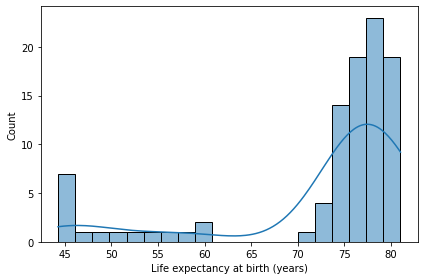

In [16]:
sns.histplot(x='LEABY', data=df, kde=True, bins=20)
plt.xlabel("Life expectancy at birth (years)")
plt.tight_layout()
plt.savefig("figs\hist_leaby.png", dpi=150)
plt.show()

From histogram above we can see that the distribution is skewed to the left, with most of the data are on the right side of the plot. 

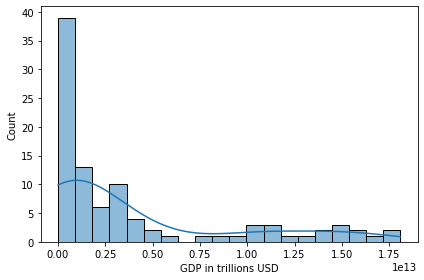

In [17]:
sns.histplot(x='GDP', data=df, kde=True, bins=20)
plt.xlabel("GDP in trillions USD")
plt.tight_layout()
plt.savefig("figs\hist_gdp.png", dpi=150)
plt.show()

Next we observe the distribution of GDP. Opposite to the life expectancy distribution, GDP distribution is skewed to the right, where most of the data are on the left side of the plot.

### Average Life Expectancy and GDP

In [18]:
df_mean = df.groupby('Country').mean().reset_index().drop('Year', axis=1)
df_mean

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


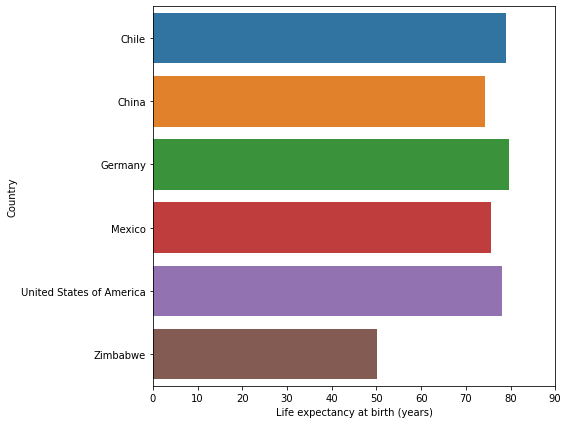

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x='LEABY',
            y='Country',
            data=df_mean,
            orient='h')
plt.xlabel('Life expectancy at birth (years)')
plt.xlim(0, 90)
plt.tight_layout()
plt.savefig("figs/bar_avg_leaby.png", dpi=150)
plt.show()

Germany, Chile, United States of America, Mexico and China has relatively close life expectancy at 70 - 80 years. Zimbabwe shows a very far average life expectancy from other country, showing only average life expectancy at 50 years.

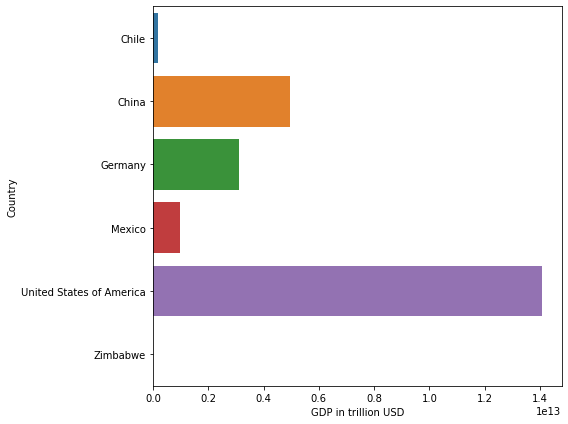

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x='GDP',
            y='Country',
            data=df_mean,
            orient='h')
plt.tight_layout()
plt.savefig("figs/bar_avg_gdp.png", dpi=150)
plt.xlabel('GDP in trillion USD')
plt.show()

This figure shows that USA has far higher GDP than other country. Chile is barely seen and even Zimbabwe is not visible.

### Distribution of Life Expectancy and GDP

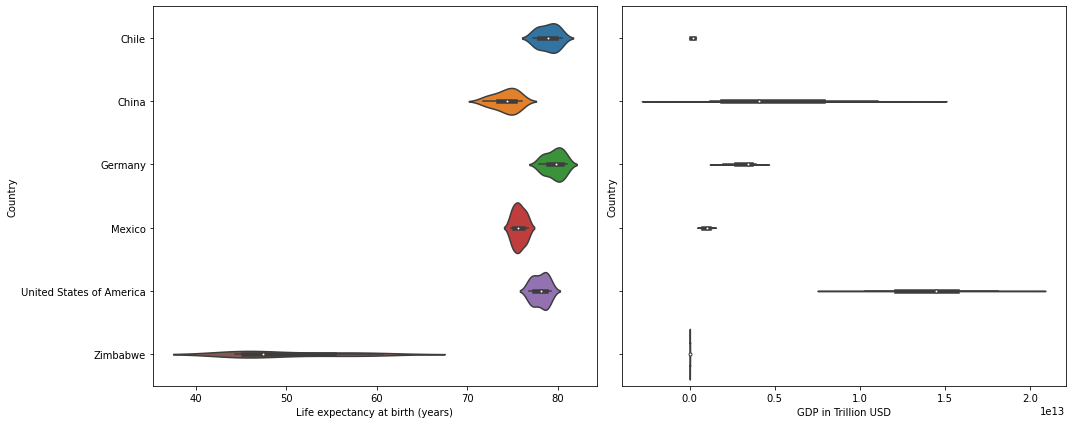

In [21]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
axes[0] = sns.violinplot(ax=axes[0], x='LEABY', y='Country', data=df)
axes[0].set_xlabel("Life expectancy at birth (years)")
axes[1] = sns.violinplot(ax=axes[1], x='GDP', y='Country', data=df)
axes[1].set_xlabel("GDP in Trillion USD")
plt.tight_layout()
plt.savefig("figs/violin_graph.png", dpi=150)
plt.show()

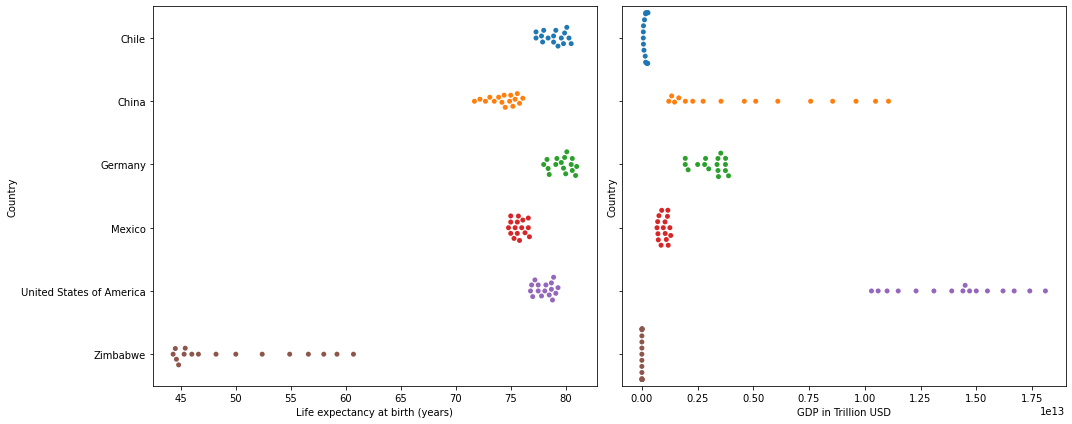

In [22]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
axes[0] = sns.swarmplot(ax=axes[0], x='LEABY', y='Country', data=df)
axes[0].set_xlabel("Life expectancy at birth (years)")
axes[1] = sns.swarmplot(ax=axes[1], x='GDP', y='Country', data=df)
axes[1].set_xlabel("GDP in Trillion USD")
plt.tight_layout()
plt.savefig("figs/swarm_graph.png", dpi=150)
plt.show()

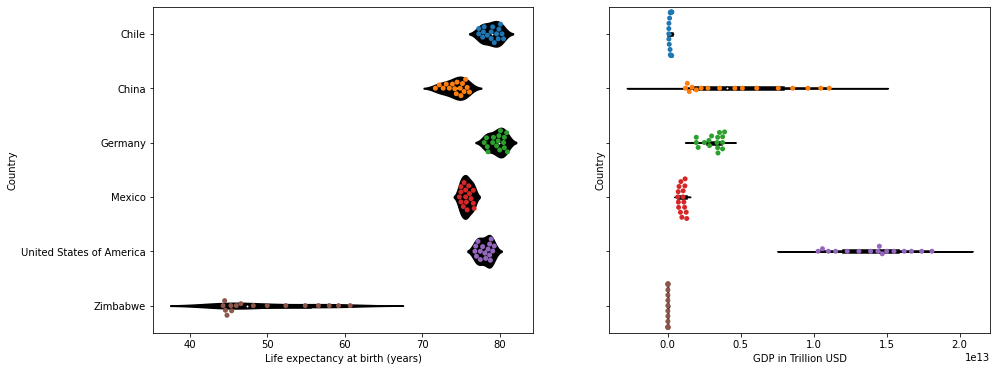

In [23]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
axes[0] = sns.violinplot(ax=axes[0], x='LEABY', y='Country', data=df, color='black')
axes[0] = sns.swarmplot(ax=axes[0], x='LEABY', y='Country', data=df)
axes[0].set_xlabel("Life expectancy at birth (years)")
axes[1] = sns.violinplot(ax=axes[1], x='GDP', y='Country', data=df, color='black')
axes[1] = sns.swarmplot(ax=axes[1], x='GDP', y='Country', data=df)
axes[1].set_xlabel("GDP in Trillion USD")
plt.savefig("figs/violin_swarm.png", dpi=150)
plt.show()

In these swarm plot, each dot represents value for each year. We can see more clearly the spread of life expectancy and GDP across six countries. Zimbabwe, having lowest GDP also shows the lowest life expectancy. For other country its varied. For example, despite USA having the highest GDP, its average life expectancy ranks in third.

Life expectancy in Zimbabwe is more distributed in each year, compared to other countries where the dot seemed swarmed together. The opposite happens in GDP, where Zimbabwe shows a vertical line in its value indicating that Zimbabwe's GDP growth is not as high as other country. China's GDP growth is interesting, while the lowest value is lower than Germany's lowest GDP point, its highest point is far exceeding Germany's highest GDP point.

To see how each country's life expectancy and GDP changes across year, we will visualize it using line plot.

### Life Expectancy and GDP Change Over Time

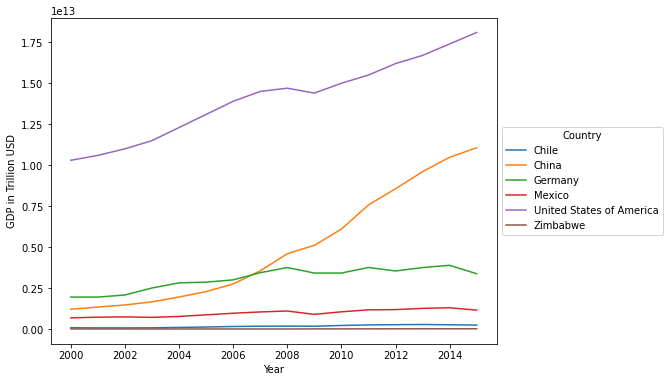

In [24]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='GDP', hue='Country', data=df)
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillion USD")
plt.savefig("figs/line_gdp.png", dpi=150)
plt.show()

By using line plot, we can see how GDP changes every year. USA and China shows substantial gains between 2000-2015. Germany, Mexico and Chile appear to have increased GDP as well. Zimbabwe seems to be stagnant like shown in the swarm plot. Though maybe this is because of scale, we will check it further later.

In 2000, China have lower GDP than Germany. But starting from 2003, we can see China's GDP start to increase rapidly. In 2007, China's GDP have been higher than Germany's and by 2015, China's GDP is 3 times higher than Germany!

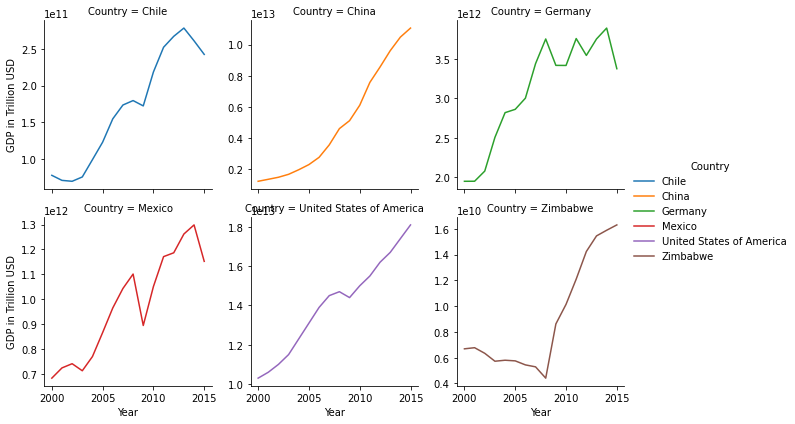

In [25]:
gdpgraph = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
gdpgraph.map(sns.lineplot, 'Year', 'GDP')
gdpgraph.add_legend()
gdpgraph.set_axis_labels("Year", "GDP in Trillion USD")
plt.savefig("figs/line_gdp_all.png", dpi=150)
plt.show()

By seeing the graph of each country on different y-scale, we see that each country has increased GDP from 2000. China and USA having the smoothest growth, while other country seems quite fluctuating from 2000 to 2015. Zimbabwe experience decreased GDP from 2000 to 2008, but increased onward to 2015.

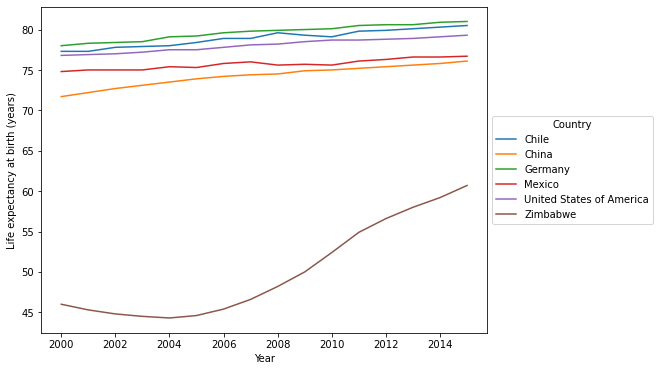

In [26]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='LEABY', hue='Country', data=df)
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")
plt.savefig("figs/line_leaby.png", dpi=150)
plt.show()

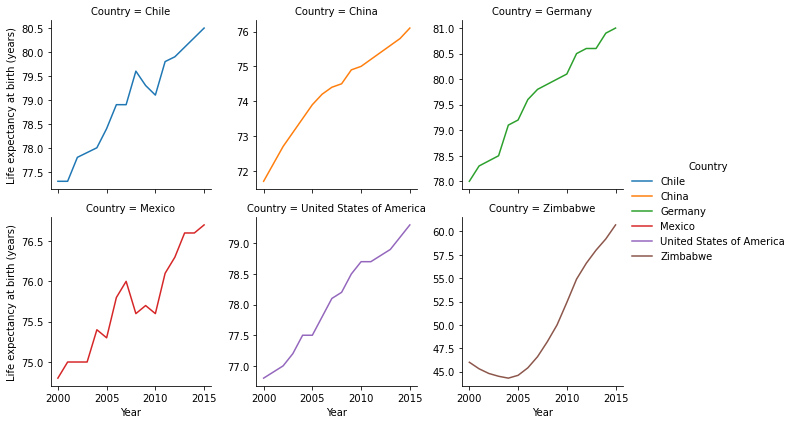

In [27]:
LEABYgraph = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
LEABYgraph.map(sns.lineplot, 'Year', 'LEABY')
LEABYgraph.add_legend()
LEABYgraph.set_axis_labels("Year", "Life expectancy at birth (years)")
plt.savefig("figs/lineall_leaby.png", dpi=150)
plt.show()

The chart shows that every country has their life expectancy increased over year. Zimbabwe, while having low life expectancy at 45 years in 2000, shows the greatest growth compared to other country after a bit declining in 2004. 

### Correlation of GDP and Life Expectancy

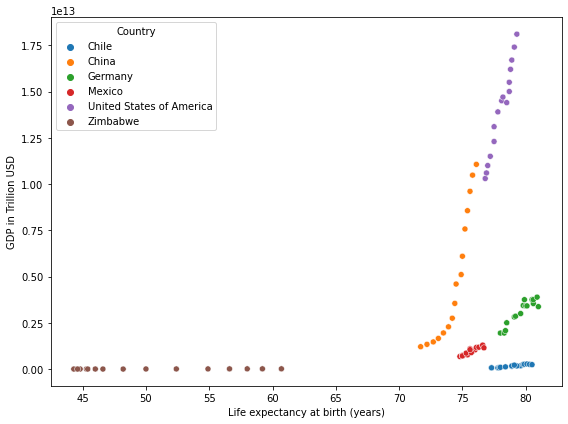

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LEABY', y='GDP', data=df, hue='Country')
plt.legend(title='Country', loc='best')
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillion USD")
plt.tight_layout()
plt.savefig("figs/scatterplot.png", dpi=150)
plt.show()

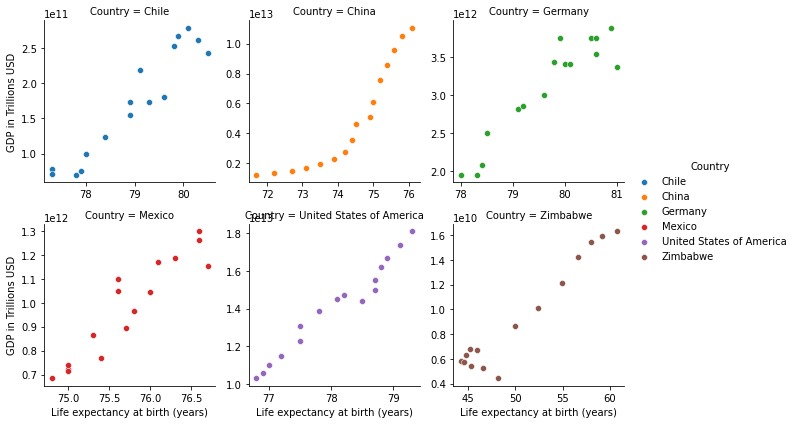

,Country,GDP vs. LEABY correlation
0,Chile,0.949877
1,China,0.908526
2,Germany,0.932699
3,Mexico,0.932238
4,United States of America,0.981709
5,Zimbabwe,0.966200


In [29]:
graph = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False, sharex=False)
graph.map(sns.scatterplot, 'LEABY', 'GDP')
graph.add_legend()
graph.set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions USD")
plt.savefig("figs/scatterplot_all.png", dpi=150)
plt.show()

# calculating correlation for each country
countries = df.Country.unique()
corr_list = []
for i in countries:
    corr, p = pearsonr(df.LEABY[df.Country == i], df.GDP[df.Country == i])
    corr_list.append(corr)

# convert the list to dataframe
corr_df = pd.DataFrame({'Country': countries, 'GDP vs. LEABY correlation': corr_list})
corr_df

By looking at the scatter plot, we can see there is linear relationship between GDP and Life expectancy for each country. We also see that correlation coefficient for every country is very high; more than 0.9.

## Conclusion
***
Through working with the data set, we've found some interesting conclusions:
- Life expectancy at birth increased over time in all 6 countries, with Zimbabwe having the largest increase.
- GDP has increased over time as well, especially for China.
- Life expectancy for 6 countries is skewed to the left, where most of the observation is on the right side
- Average life expectancy is between mid to high 70s, except for Zimbabwe which is 50 years.
- There is a strong relationship between GDP and life expectancy, with all countries has coefficient at > 0.9.

## Future Directions
***
Some interesting question we can explore further from this study is:
- Zimbabwe's GDP dropped from 2000 to 2008, is there particular reason that caused it?
- Are there other variable that largely affect life expectancy of a country? Some variable we can explore is infant deaths and BMI
- What caused China's GDP to increase significantly from 2000 to 2015?

An article from [Forbes](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/?sh=126c4c43f135) explains China’s rise to peerless GDP growth is caused by its large population, skyrockets of its capital investment and more efficient manufacturing process. Our findings in data matched the real world scenario for GDP growth in China.